<a href="https://colab.research.google.com/github/tsaniarisqi/Machine_Learning_2022/blob/main/kuis02/Kuis02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Tsania Risqi El Istiqomah 
* Kelas : TI-4J
* NIM : 2241727041


---



# KUIS 02


**Soal**
1. Buat 5 jenis visualisasi yang dapat dihasilkan dari data yang diberikan! (5 poin)
2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)
3. Tentukan data validasi! (5 poin)
4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
5. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
6. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (15 poin)
7. Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search! (20 poin)
8. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)



## Load Data

In [141]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
# import package
import numpy as np
import pandas as pd

In [143]:
# baca data
data = pd.read_csv('/content/drive/MyDrive/dataset/kuis02/dataset_quiz.csv')
data.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [144]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_ketua            82 non-null     float64
 1   id_anggota1         80 non-null     float64
 2   id_anggota2         81 non-null     float64
 3   id_anggota3         82 non-null     float64
 4   id_anggota4         72 non-null     float64
 5   id_anggota5         1 non-null      float64
 6   keterlibatan_vltr   85 non-null     object 
 7   jml_vltr_terlibat   85 non-null     int64  
 8   tahun               85 non-null     int64  
 9   skema               85 non-null     object 
 10  luaran_hki          85 non-null     object 
 11  jenis_luaran_hki    85 non-null     object 
 12  potensi_hki         85 non-null     object 
 13  luaran_lain         85 non-null     object 
 14  jenis_luaran_lain   85 non-null     object 
 15  status_luaran_lain  85 non-null     object 
dtypes: float64

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,jml_vltr_terlibat,tahun
count,82.000000,80.000000,81.000000,82.000000,72.000000,1.0,85.000000,85.000000
mean,7954.890244,8156.162500,8266.012346,8419.048780,8572.388889,8812.0,1.341176,2020.611765
std,866.038391,1178.330792,1473.210537,1102.408787,1137.673912,NaN,1.452034,1.155670
min,5903.000000,569.000000,569.000000,569.000000,569.000000,8812.0,0.000000,2019.000000
25%,7703.000000,7607.000000,7903.000000,8101.000000,8276.000000,8812.0,0.000000,2020.000000
50%,8152.500000,8501.500000,8804.000000,8702.500000,8903.500000,8812.0,0.000000,2021.000000
75%,8602.000000,8903.000000,9002.000000,8905.750000,9030.750000,8812.0,3.000000,2022.000000
max,9209.000000,9402.000000,9402.000000,9303.000000,9303.000000,8812.0,4.000000,2022.000000


## Data Cleaning

In [145]:
# cek apakah dalam dataset terdapat nilai yang kosong
data.isnull().sum()

id_ketua               3
id_anggota1            5
id_anggota2            4
id_anggota3            3
id_anggota4           13
id_anggota5           84
keterlibatan_vltr      0
jml_vltr_terlibat      0
tahun                  0
skema                  0
luaran_hki             0
jenis_luaran_hki       0
potensi_hki            0
luaran_lain            0
jenis_luaran_lain      0
status_luaran_lain     0
dtype: int64

Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah id_ketua, id_anggota1, id_anggota2, id_anggota3, id_anggota4 dan id_anggota5.

In [146]:
# mengisi missing value
data['id_ketua'].fillna(0, inplace=True)
data['id_anggota1'].fillna(0, inplace=True)
data['id_anggota2'].fillna(0, inplace=True)
data['id_anggota3'].fillna(0, inplace=True)
data['id_anggota4'].fillna(0, inplace=True)
data['id_anggota5'].fillna(0, inplace=True)

In [147]:
# cek kembali apakah dalam dataset terdapat nilai yang kosong
data.isnull().sum()

id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
id_anggota4           0
id_anggota5           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

## Nomor 1
Buat 5 jenis visualisasi yang dapat dihasilkan dari data yang diberikan! (5 poin)

In [148]:
# import package
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show

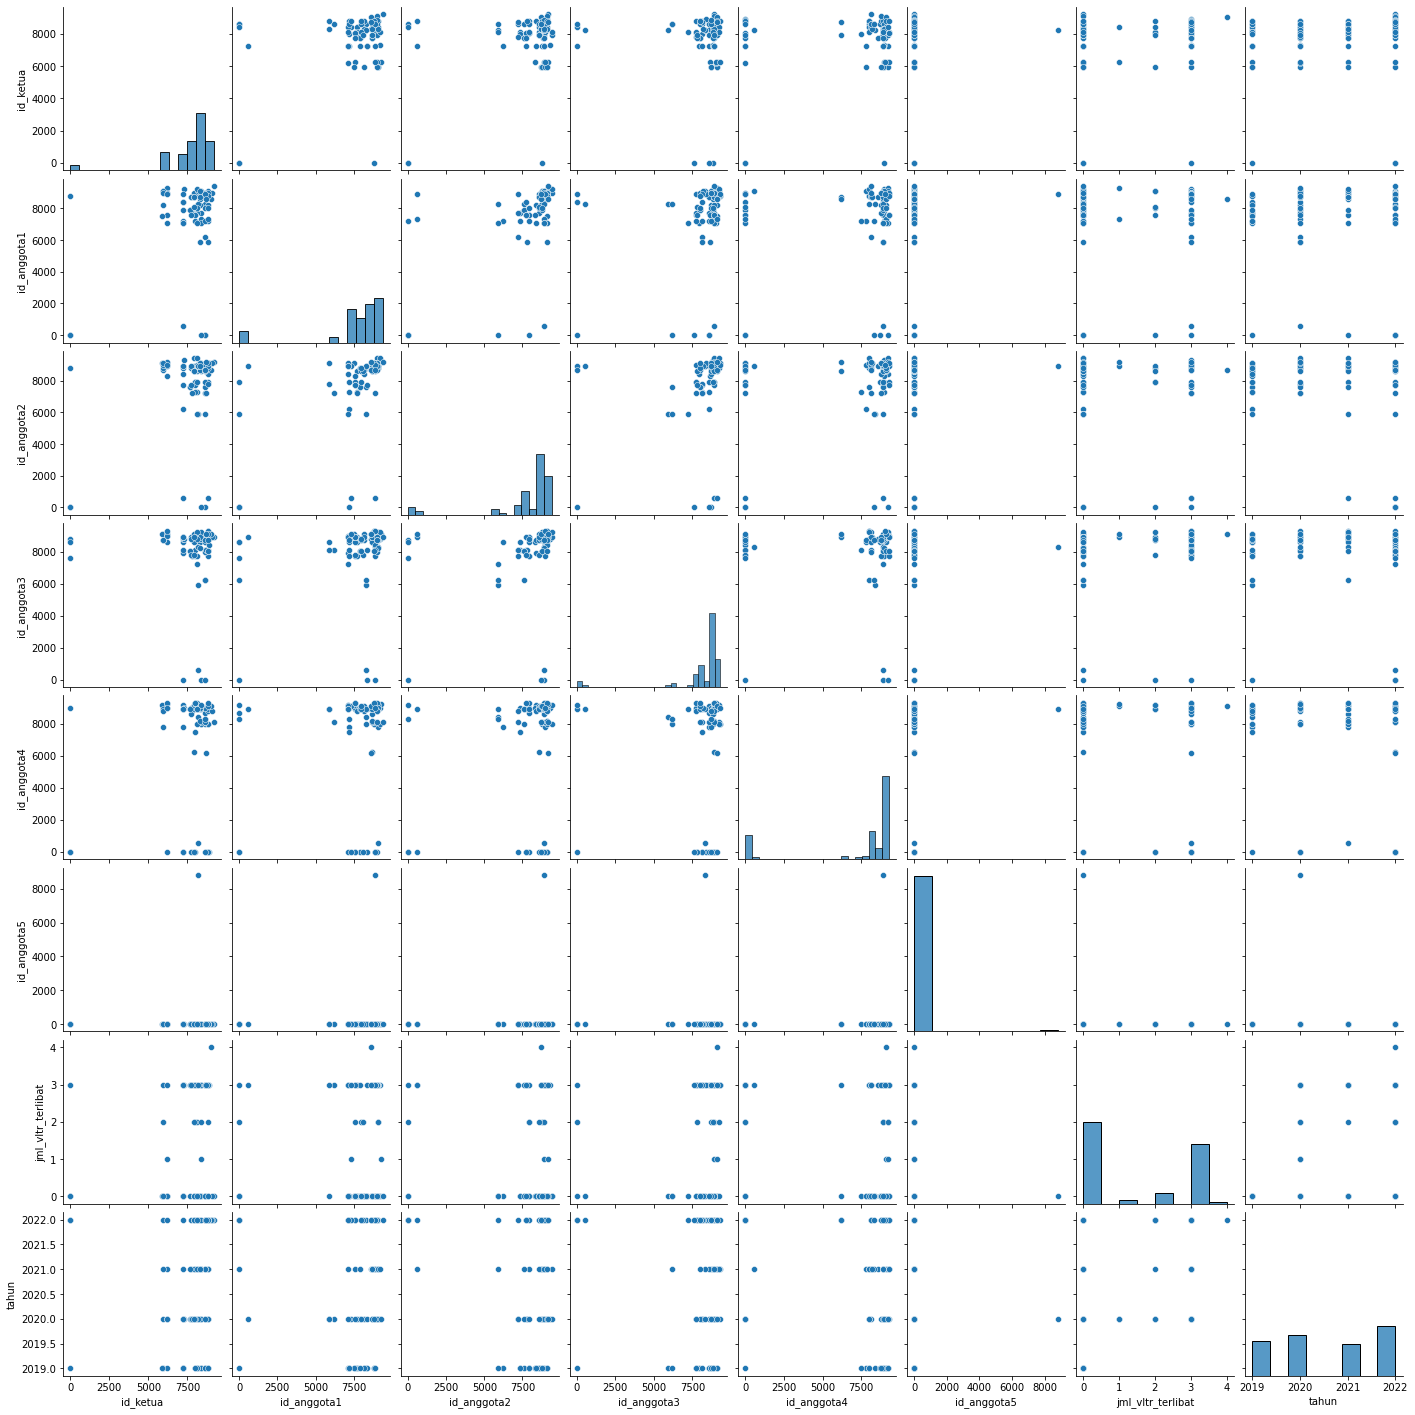

In [149]:
sns.pairplot(data)
plt.show()

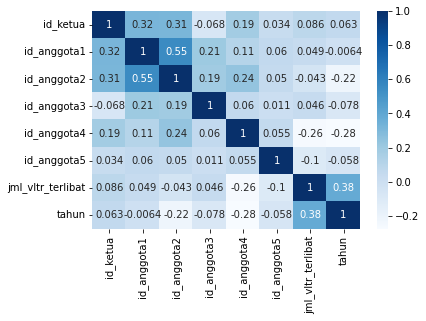

In [150]:
sns.heatmap(data.corr(),cmap='Blues', annot= True)

dari bentuk visualisasi di atas terlihat bahwa jml_vltr_terlibat memiliki korelasi yang paling kuat terhadap tahun

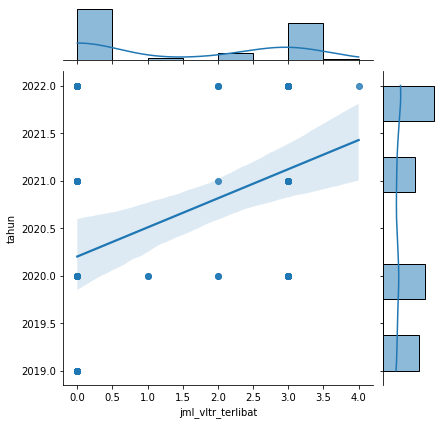

In [151]:
sns.jointplot(x='jml_vltr_terlibat', y='tahun', data=data, kind = 'reg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


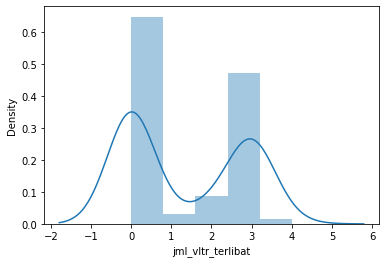

In [152]:
sns.distplot(data['jml_vltr_terlibat'], bins=5, kde=True)

Persentase jumlah volunter

Text(0.5, 1.0, 'Persentase Jumlah Volunter')

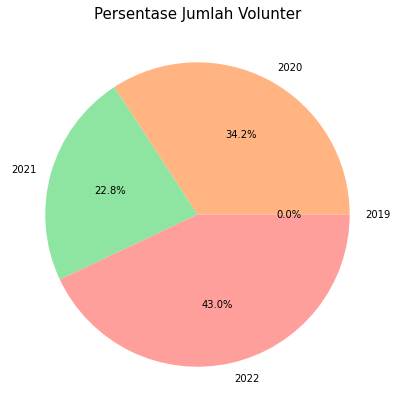

In [153]:
colors = sns.color_palette('pastel')[0:7]
sizes = data.groupby(data['tahun'])['jml_vltr_terlibat'].sum()

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=sizes.index, colors=colors, autopct='%1.1f%%')
plt.title('Persentase Jumlah Volunter',color = 'black',fontsize = 15)

Total luaran HKI dan luaran lain per tahun

Text(0.5, 1.0, 'Total Luaran Lain per Tahun')

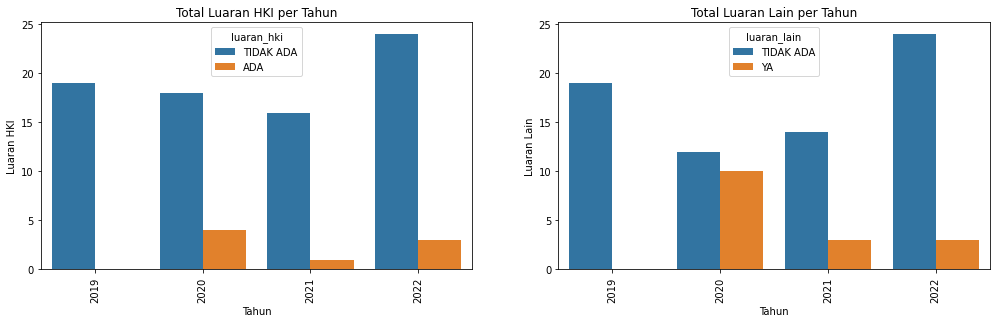

In [154]:
plt.figure(figsize=(17,10))

plt.subplot(2,2,1)
sns.countplot(x='tahun', hue='luaran_hki', data=data)
plt.ylabel('Luaran HKI') 
plt.xlabel('Tahun')
plt.xticks(rotation=90)
plt.title('Total Luaran HKI per Tahun')

plt.subplot(2,2,2)
sns.countplot(x='tahun', hue='luaran_lain', data=data)
plt.ylabel('Luaran Lain') 
plt.xlabel('Tahun')
plt.xticks(rotation=90)
plt.title('Total Luaran Lain per Tahun')

## Nomor 2
Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)

In [175]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

data['keterlibatan_vltr'] = encode.fit_transform(data['keterlibatan_vltr'])
data['skema'] = encode.fit_transform(data['skema'])
data['luaran_hki'] = encode.fit_transform(data['luaran_hki'])
data['jenis_luaran_hki'] = encode.fit_transform(data['jenis_luaran_hki'])
data['potensi_hki'] = encode.fit_transform(data['potensi_hki'])
data['luaran_lain'] = encode.fit_transform(data['luaran_lain'])
data['jenis_luaran_lain'] = encode.fit_transform(data['jenis_luaran_lain'])
data['status_luaran_lain'] = encode.fit_transform(data['status_luaran_lain'])

In [176]:
# info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_ketua            85 non-null     float64
 1   id_anggota1         85 non-null     float64
 2   id_anggota2         85 non-null     float64
 3   id_anggota3         85 non-null     float64
 4   id_anggota4         85 non-null     float64
 5   id_anggota5         85 non-null     float64
 6   keterlibatan_vltr   85 non-null     int64  
 7   jml_vltr_terlibat   85 non-null     int64  
 8   tahun               85 non-null     int64  
 9   skema               85 non-null     int64  
 10  luaran_hki          85 non-null     int64  
 11  jenis_luaran_hki    85 non-null     int64  
 12  potensi_hki         85 non-null     int64  
 13  luaran_lain         85 non-null     int64  
 14  jenis_luaran_lain   85 non-null     int64  
 15  status_luaran_lain  85 non-null     int64  
dtypes: float64

In [177]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(data, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

print(f'Jumlah data asli: {data.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

Jumlah data asli: 85
Jumlah data train: 68
Jumlah data test: 9


## Nomor 3
Tentukan data validasi! (5 poin)

In [178]:
print(f'Jumlah data val: {df_val.shape[0]}')

Jumlah data val: 8


## Nomor 4
Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)

In [179]:
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [180]:
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(df_train, df_val)

# Memprediksi label set test
y_pred_dt = dt.predict(df_unseen)

#  menghitung set accuracy
acc_dt = accuracy_score(df_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

ValueError: ignored

## Nomor 5
Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)

## Nomor 6
Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (15 poin)

## Nomor 7
Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search! (20 poin)

## Nomor 8
Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)